In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/home/dcti-02-11/projects/data/NYC_Taxi_Trips/data/clean_trips_2020.csv"

trips_2020 = pd.read_csv(file_path)

In [3]:
trips_2020.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_day,dropoff_day,Hours,Minutes,Seconds,TimeOnly
0,2,2020-01-01 06:47:28,2020-01-01 06:52:54,False,1,74,75,1,1.47,6.5,...,2020-01-01,2020-01-01,1,1,Wednesday,Wednesday,0,5,26,00:05:26
1,2,2020-01-01 13:25:34,2020-01-01 13:30:43,False,1,74,75,1,1.49,6.5,...,2020-01-01,2020-01-01,1,1,Wednesday,Wednesday,0,5,9,00:05:09
2,2,2020-01-01 14:20:35,2020-01-01 14:26:25,False,1,74,75,1,1.31,6.5,...,2020-01-01,2020-01-01,1,1,Wednesday,Wednesday,0,5,50,00:05:50
3,2,2020-01-02 06:56:47,2020-01-02 07:03:03,False,1,74,75,1,1.43,6.5,...,2020-01-02,2020-01-02,1,1,Thursday,Thursday,0,6,16,00:06:16
4,2,2020-01-02 09:34:46,2020-01-02 09:41:02,False,1,74,75,1,1.10,6.5,...,2020-01-02,2020-01-02,1,1,Thursday,Thursday,0,6,16,00:06:16


In [4]:
trips_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980251 entries, 0 to 980250
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               980251 non-null  int64  
 1   lpep_pickup_datetime   980251 non-null  object 
 2   lpep_dropoff_datetime  980251 non-null  object 
 3   store_and_fwd_flag     980251 non-null  bool   
 4   RatecodeID             980251 non-null  int64  
 5   PULocationID           980251 non-null  int64  
 6   DOLocationID           980251 non-null  int64  
 7   passenger_count        980251 non-null  int64  
 8   trip_distance          980251 non-null  float64
 9   fare_amount            980251 non-null  float64
 10  extra                  980251 non-null  float64
 11  mta_tax                980251 non-null  float64
 12  tip_amount             980251 non-null  float64
 13  tolls_amount           980251 non-null  float64
 14  improvement_surcharge  980251 non-nu

## Replace and convert columns to the appropriate data types

In [5]:
# convert passenger count from float to int
list_convert = ['VendorID','RatecodeID','payment_type','trip_type','passenger_count']
trips_2020[list_convert] = trips_2020[list_convert].astype(int)

In [6]:
# convert the following columns to category
list_convert = ['VendorID','RatecodeID','payment_type','trip_type']
trips_2020[list_convert] = trips_2020[list_convert].astype('category')

In [7]:
# convert pickup and dropoff to datetime
trips_2020['lpep_pickup_datetime'] = pd.to_datetime(trips_2020['lpep_pickup_datetime'])
trips_2020['lpep_dropoff_datetime'] = pd.to_datetime(trips_2020['lpep_dropoff_datetime'])

## Adding new Columns

In [8]:
# Make the changes permanent by modifying the data type of 'time_diff' column to timedelta
trips_2020['time_diff'] = pd.to_timedelta(trips_2020['time_diff'], errors='coerce')

In [9]:
# get the pickup and dropoffs dates only
trips_2020['pickup_date'] = pd.to_datetime(trips_2020['lpep_pickup_datetime'].dt.date)
trips_2020['dropoff_date'] = pd.to_datetime(trips_2020['lpep_dropoff_datetime'].dt.date)

In [10]:
df = trips_2020

In [26]:

def plot_column_distribution(dataframe, column_name, plot_title='Column Distribution', figsize=(8, 8)):
    column_count = dataframe[column_name].value_counts()

    # Generate a set of distinct colors using seaborn's color_palette
    num_categories = len(column_count)
    colors = sns.color_palette("tab20", num_categories)

    fig, ax = plt.subplots(figsize=figsize)
    center_circle = plt.Circle((0, 0), 0.7, color='white')

    # Create a custom label for each category, showing both the percentage and the exact count
    labels = [f"{category} - {count} ({count/len(dataframe)*100:.2f}%)"
              for category, count in zip(column_count.index, column_count.values)]

    plt.pie(x=column_count.values, labels=labels, autopct='', startangle=90,
            textprops={'size': 12}, pctdistance=0.5, colors=colors)

    ax.add_artist(center_circle)
    fig.suptitle(plot_title, fontsize=16)
    plt.show()


In [28]:
def generate_countplot(dataframe, column_name):
    """
    Generate a countplot for the specified column in the given DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    # Create the countplot
    ax = sns.countplot(x=column_name, data=dataframe)

    # Set labels and title
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Countplot of {column_name}')

    # Add percentage labels to the bars
    total_count = len(dataframe)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)  # Set font size for the labels

    # Show the plot
    plt.show()


In [11]:
# 1. Trip Duration: What is the average duration of taxi trips based on the pickup and drop-off timestamps?
df['trip_duration_minutes'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

average_duration = df['trip_duration_minutes'].mean()
print(f"Average trip duration (minutes): {average_duration:.2f}")

Average trip duration (minutes): 9.99


In [12]:
# 2. Store and Forward Flag: How many trips had the "store_and_fwd_flag" set to true? 
#    Is there any correlation between this flag and trip duration or distance?

# Number of trips with store_and_fwd_flag = True
store_fwd_trips = df[df['store_and_fwd_flag'] == True]
print(f"Number of trips with store_and_fwd_flag = True: {len(store_fwd_trips)}")

# Number of trips with store_and_fwd_flag = False
non_store_fwd_trips = df[df['store_and_fwd_flag'] == False]
print(f"Number of trips with store_and_fwd_flag = False: {len(non_store_fwd_trips)}")

# Calculate correlation between store_and_fwd_flag and trip duration
correlation_duration = df['store_and_fwd_flag'].corr(df['trip_duration_minutes'])
print(f"Correlation between store_and_fwd_flag and trip duration: {correlation_duration}")

# Calculate correlation between store_and_fwd_flag and trip distance
correlation_distance = df['store_and_fwd_flag'].corr(df['trip_distance'])
print(f"Correlation between store_and_fwd_flag and trip distance: {correlation_distance}")

Number of trips with store_and_fwd_flag = True: 3245
Number of trips with store_and_fwd_flag = False: 977006
Correlation between store_and_fwd_flag and trip duration: 0.003336964563705974
Correlation between store_and_fwd_flag and trip distance: 0.0009820932041911307


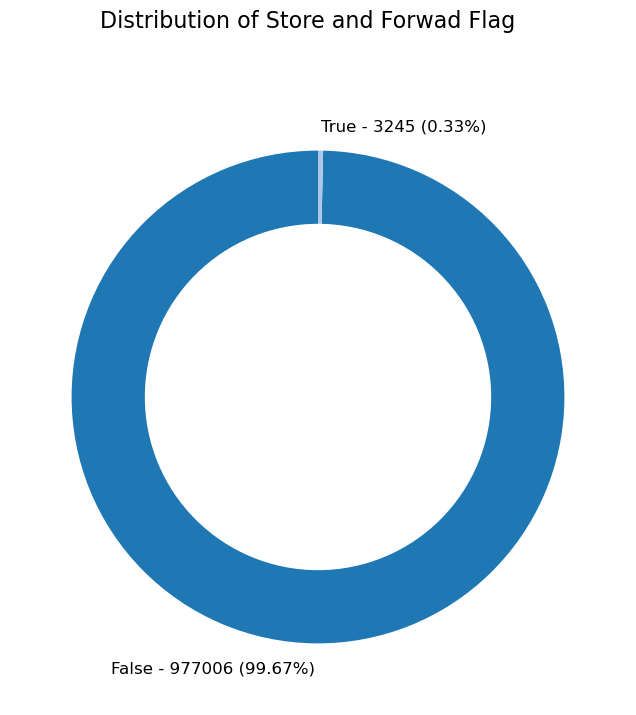

In [31]:
column_name = 'store_and_fwd_flag'
plot_column_distribution(df, column_name, plot_title='Distribution of Store and Forwad Flag', figsize=(8, 8))

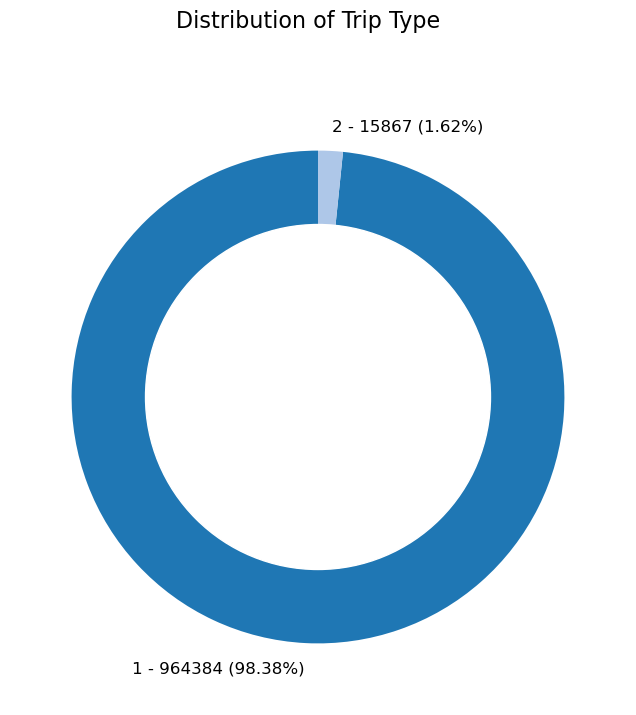

In [29]:
column_name = 'trip_type'
plot_column_distribution(df, column_name, plot_title='Distribution of Trip Type', figsize=(8, 8))

In [13]:
# 3. Ratecode Analysis: What are the distribution and frequencies of different rate codes? 
#    Are there any rate codes that are more commonly used?
ratecode_counts = df['RatecodeID'].value_counts()
print("Distribution of Rate Codes:")
print(ratecode_counts)

Distribution of Rate Codes:
1    963770
5     16302
3       107
4        62
2         5
6         5
Name: RatecodeID, dtype: int64


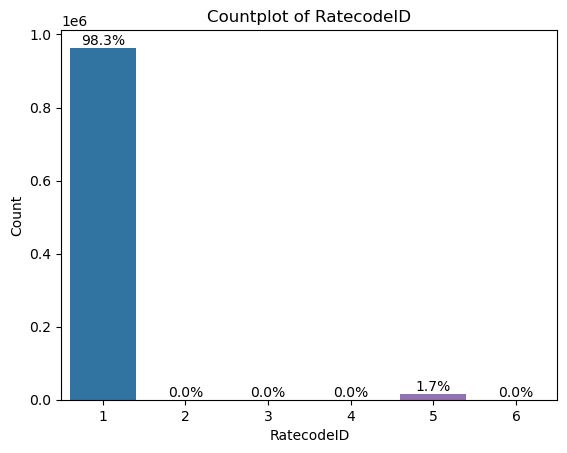

In [32]:
# Example usage with custom column name
column_name = 'RatecodeID'

generate_countplot(df, column_name)

In [14]:
passenger_counts = df['passenger_count'].value_counts()
print("Distribution of passenger_count:")
print(passenger_counts)

Distribution of passenger_count:
1    849477
2     66526
5     25864
6     18173
3     13047
4      4591
0      2531
7        18
8        17
9         7
Name: passenger_count, dtype: int64


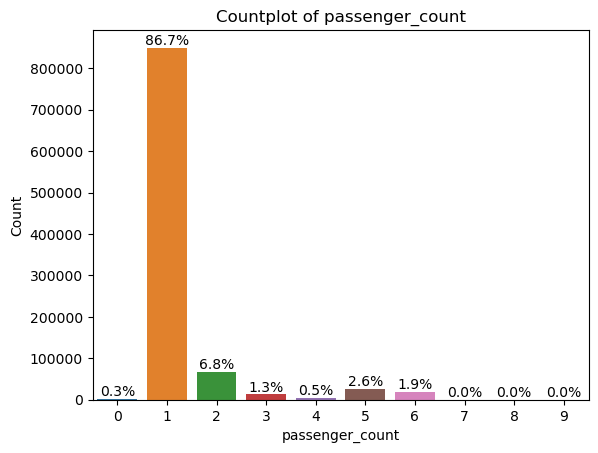

In [33]:
# Example usage with custom column name
column_name = 'passenger_count'

generate_countplot(df, column_name)

In [15]:
# 4. Passenger Count: What is the average passenger count per trip? 
#    Are there any correlations between passenger count and trip distance or fare amount?
average_passenger_count = df['passenger_count'].mean()
correlation_passenger_distance = df['passenger_count'].corr(df['trip_distance'])
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])

print(f"Average passenger count per trip: {average_passenger_count:.2f}")
print(f"Correlation between passenger count and trip distance: {correlation_passenger_distance:.2f}")
print(f"Correlation between passenger count and fare amount: {correlation_passenger_fare:.2f}")

Average passenger count per trip: 1.30
Correlation between passenger count and trip distance: -0.01
Correlation between passenger count and fare amount: -0.00


Average passenger count per trip: 1.30
Correlation between passenger count and trip distance: -0.01
Correlation between passenger count and fare amount: -0.00


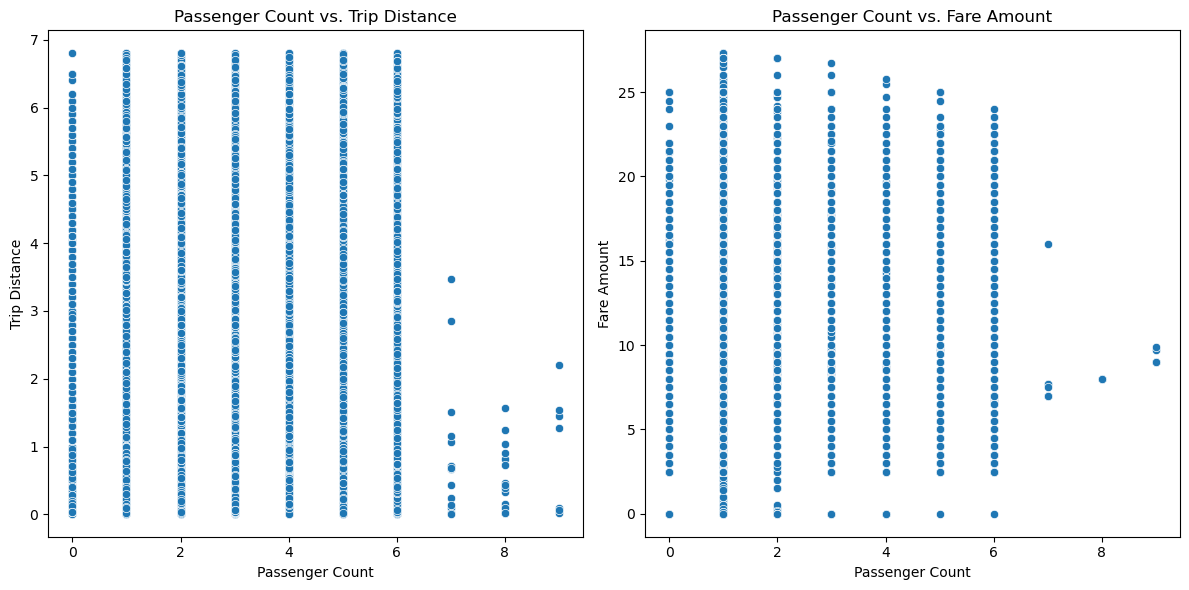

In [16]:
# Calculate the average passenger count per trip
average_passenger_count = df['passenger_count'].mean()

# Calculate the correlation between passenger count and trip distance
correlation_passenger_distance = df['passenger_count'].corr(df['trip_distance'])

# Calculate the correlation between passenger count and fare amount
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])

# Print the results
print(f"Average passenger count per trip: {average_passenger_count:.2f}")
print(f"Correlation between passenger count and trip distance: {correlation_passenger_distance:.2f}")
print(f"Correlation between passenger count and fare amount: {correlation_passenger_fare:.2f}")

# Create scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot between passenger count and trip distance
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='passenger_count', y='trip_distance')
plt.title('Passenger Count vs. Trip Distance')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance')

# Scatter plot between passenger count and fare amount
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

plt.tight_layout()
plt.show()

1. Average passenger count per trip: The average passenger count per trip is approximately 1.30. This means that, on average, there are around 1.30 passengers in each trip.

2. Correlation between passenger count and trip distance: The correlation between passenger count and trip distance is approximately -0.01. This correlation is very close to zero, indicating that there is almost no linear relationship between passenger count and trip distance. In other words, the number of passengers does not significantly impact the trip distance.

3. Correlation between passenger count and fare amount: The correlation between passenger count and fare amount is approximately -0.00. Similar to the correlation with trip distance, this value is very close to zero, suggesting that there is almost no linear relationship between the number of passengers and the fare amount. In other words, the number of passengers does not significantly impact the fare amount.

Overall, the results show that there is no strong linear relationship between the number of passengers and either the trip distance or the fare amount. The small correlation coefficients near zero indicate that passenger count does not have a substantial impact on trip distance or fare amount in this dataset.

Average trip distance: 3.08


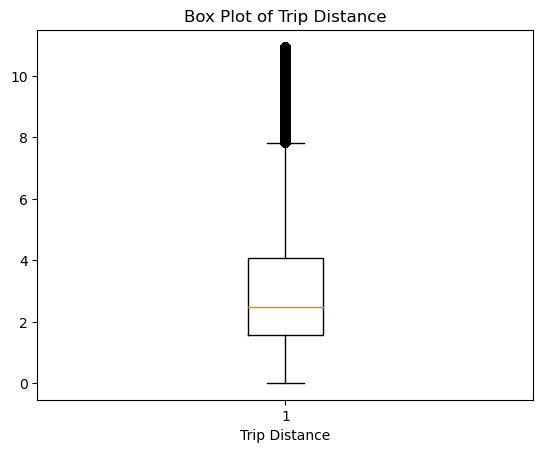

In [17]:
# 5. Trip Distance: What is the average trip distance covered by taxis? 
#    Can you identify any outliers or unusually long or short trips?
average_trip_distance = df['trip_distance_km'].mean()
print(f"Average trip distance: {average_trip_distance:.2f}")

# Box plot to identify outliers in trip distance
plt.boxplot(df['trip_distance_km'])
plt.xlabel('Trip Distance')
plt.title('Box Plot of Trip Distance')
plt.show()

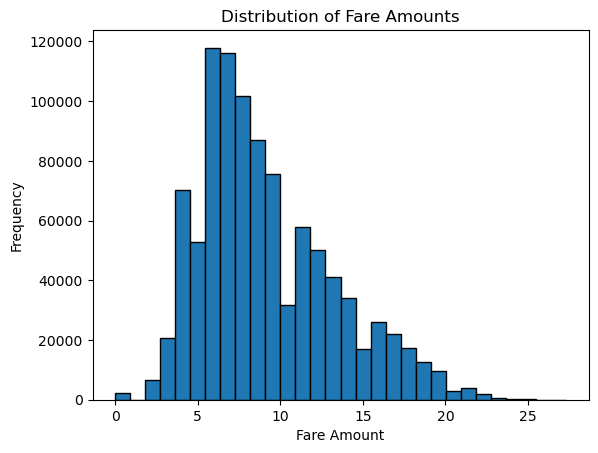

In [18]:
# 6. Fare Analysis: What is the distribution of fare amounts? 
#    Are there any factors such as distance or time that significantly influence fare amounts?
plt.hist(df['fare_amount'], bins=30, edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts')
plt.show()

In [19]:
# 7. Extra Charges: How often and in what circumstances are extra charges applied? 
#    Is there any correlation between extra charges and total fare amounts?
extra_charges_counts = df['extra'].value_counts()
print("Frequency of Extra Charges:")
print(extra_charges_counts)

correlation_extra_fare = df['extra'].corr(df['total_amount'])
print(f"Correlation between extra charges and total fare amount: {correlation_extra_fare:.2f}")

Frequency of Extra Charges:
0.00    524840
0.50    226723
1.00    205796
2.75     12945
3.75      5474
3.25      4473
Name: extra, dtype: int64
Correlation between extra charges and total fare amount: 0.18


Correlation between extra charges and total fare amount: The correlation between the 'extra' charges and the 'total_amount' of the trip is approximately 0.18. This correlation coefficient indicates a positive correlation between extra charges and total fare amounts. A correlation of 0.18 suggests a relatively weak positive linear relationship between the two variables.

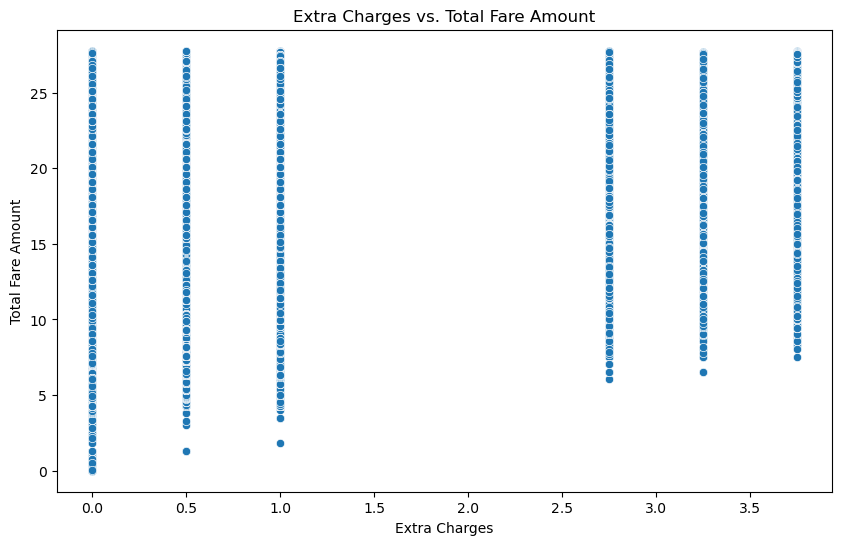

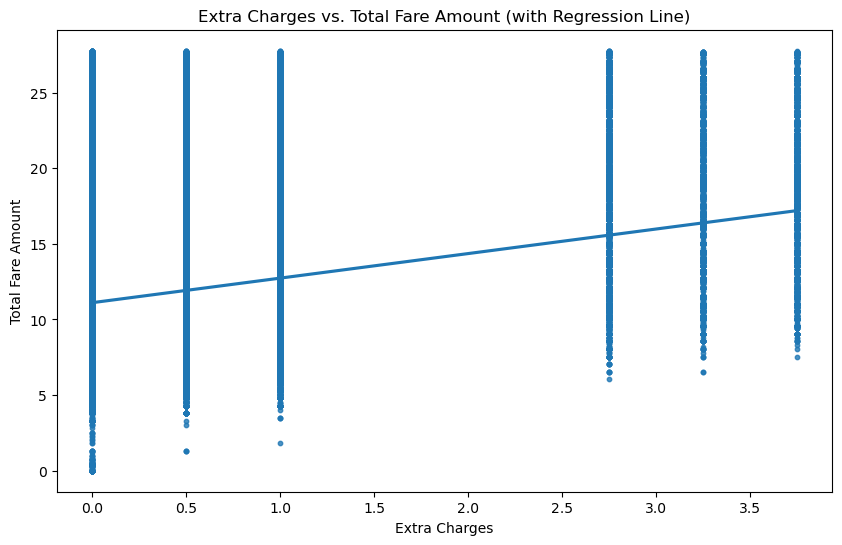

In [20]:
# Scatter plot between extra charges and total fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='extra', y='total_amount')
plt.title('Extra Charges vs. Total Fare Amount')
plt.xlabel('Extra Charges')
plt.ylabel('Total Fare Amount')
plt.show()

# Regression plot between extra charges and total fare amount
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='extra', y='total_amount', scatter_kws={'s': 10})
plt.title('Extra Charges vs. Total Fare Amount (with Regression Line)')
plt.xlabel('Extra Charges')
plt.ylabel('Total Fare Amount')
plt.show()

In [21]:
# 8. Tip Amount: What is the average tip amount given by passengers? 
#    Can you identify any patterns or trends in tipping behavior?
average_tip_amount = df['tip_amount'].mean()
print(f"Average tip amount: {average_tip_amount:.2f}")

Average tip amount: 0.99


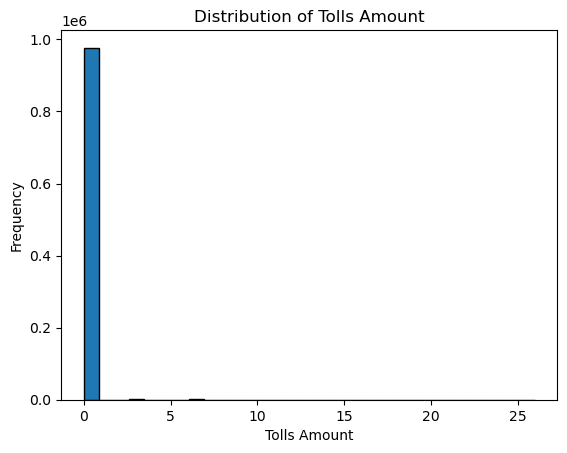

In [22]:
# 9. Tolls and Congestion Charges: What is the frequency and distribution of tolls and congestion charges incurred during trips? 
#    Are there specific locations or times when these charges are more common?
plt.hist(df['tolls_amount'], bins=30, edgecolor='black')
plt.xlabel('Tolls Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tolls Amount')
plt.show()

In [23]:
# 10. Payment Types: What are the most common payment types used by passengers? 
#     Is there any correlation between payment type and tip amount or total fare amount?
payment_type_counts = df['payment_type'].value_counts()
print("Frequency of Payment Types:")
print(payment_type_counts)

correlation_payment_tip = df['payment_type'].corr(df['tip_amount'])
correlation_payment_fare = df['payment_type'].corr(df['total_amount'])
print(f"Correlation between payment type and tip amount: {correlation_payment_tip:.2f}")
print(f"Correlation between payment type and total fare amount: {correlation_payment_fare:.2f}")

Frequency of Payment Types:
1    505605
2    470414
3      3203
4       998
5        31
Name: payment_type, dtype: int64
Correlation between payment type and tip amount: -0.71
Correlation between payment type and total fare amount: -0.30


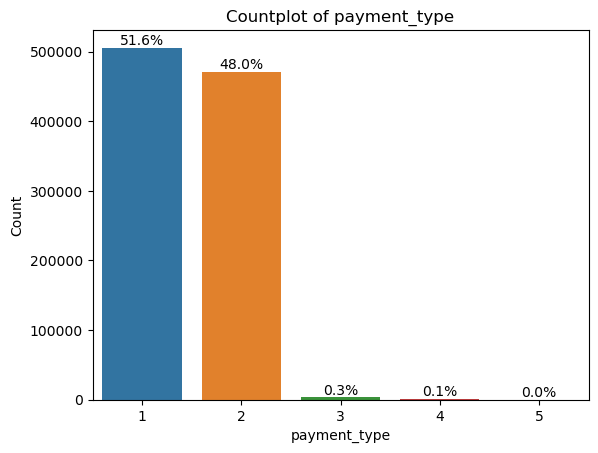

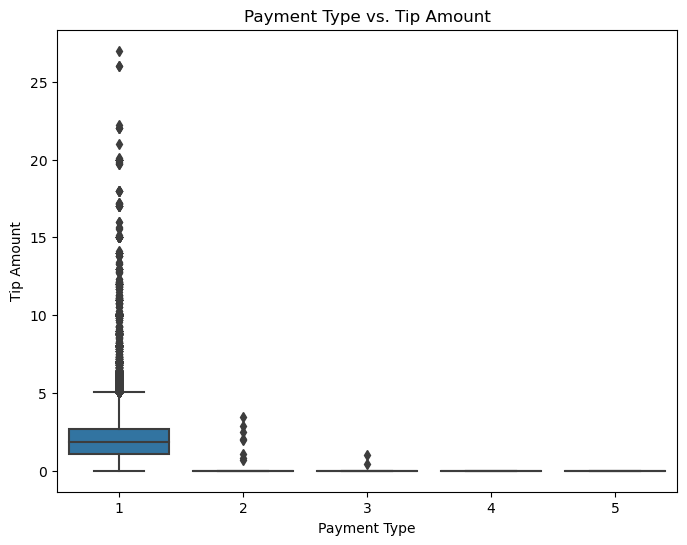

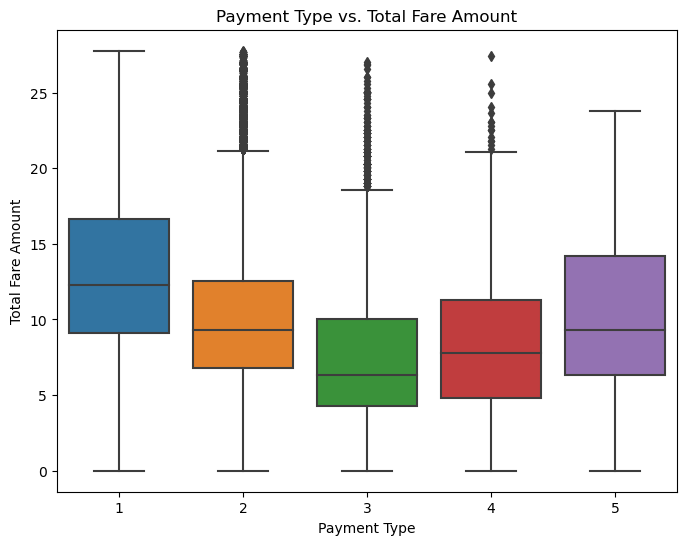

In [35]:

# Frequency of Payment Types - Bar Plot
column_name = 'payment_type'
generate_countplot(df, column_name)

# Correlation between payment type and tip amount - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment_type', y='tip_amount')
plt.title('Payment Type vs. Tip Amount')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.show()

# Correlation between payment type and total fare amount - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment_type', y='total_amount')
plt.title('Payment Type vs. Total Fare Amount')
plt.xlabel('Payment Type')
plt.ylabel('Total Fare Amount')
plt.show()


Correlation between payment type and tip amount: The correlation between the 'payment_type' and 'tip_amount' columns is approximately -0.71. This strong negative correlation suggests that passengers who use certain payment types tend to give lower tips, while passengers who use other payment types tend to give higher tips.

Correlation between payment type and total fare amount: The correlation between the 'payment_type' and 'total_amount' columns is approximately -0.30. This negative correlation indicates that the choice of payment method has a moderate effect on the total fare amount. Certain payment types may be associated with higher or lower total fare amounts compared to others.

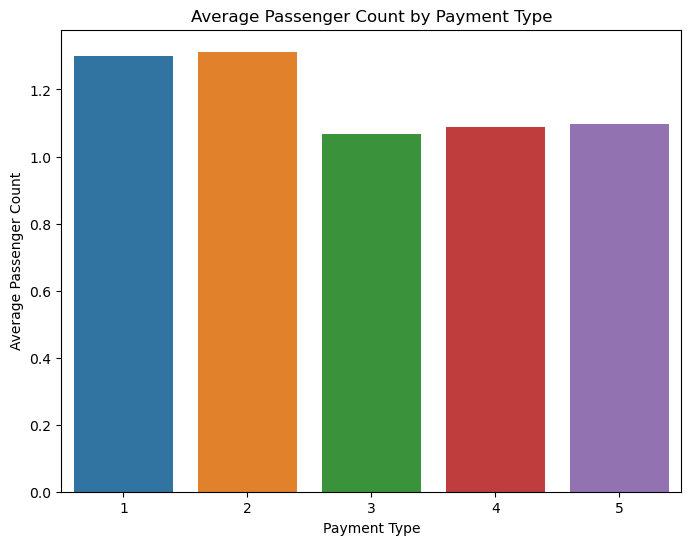

In [25]:
# Calculate the average passenger count for each payment type
average_passenger_count_by_payment = df.groupby('payment_type')['passenger_count'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_passenger_count_by_payment.index, y=average_passenger_count_by_payment.values)
plt.title('Average Passenger Count by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Passenger Count')
plt.show()

In [26]:
# 11. Trip Types: What is the distribution of trip types (e.g., street-hail, dispatch) in the dataset? 
#     Are there any differences in trip duration or fare amounts based on trip type?
trip_type_counts = df['trip_type'].value_counts()
print("Frequency of Trip Types:")
print(trip_type_counts)

Frequency of Trip Types:
1    964384
2     15867
Name: trip_type, dtype: int64


In [27]:
def analyze_pickup_dropoff_clusters(df, n_clusters=5, top=True):
    # Calculate the demand for pickup and drop-off locations
    pickup_demand = df['PULocationID'].value_counts()
    dropoff_demand = df['DOLocationID'].value_counts()

    # Determine the indexing method based on 'top' parameter
    if top:
        pickup_demand = pickup_demand.head(10)
        dropoff_demand = dropoff_demand.head(10)
    else:
        pickup_demand = pickup_demand.tail(10)
        dropoff_demand = dropoff_demand.tail(10)

    # Visualize the pickup and drop-off locations with the highest demand
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=pickup_demand.index, y=pickup_demand.values, color='grey')
    plt.title('Top 10 Pickup Locations with Highest Demand' if top else 'Bottom 10 Pickup Locations with Lowest Demand')
    plt.xlabel('PULocationID')
    plt.ylabel('Demand Count')

    plt.subplot(1, 2, 2)
    sns.barplot(x=dropoff_demand.index, y=dropoff_demand.values, color='grey')
    plt.title('Top 10 Drop-off Locations with Highest Demand' if top else 'Bottom 10 Drop-off Locations with Lowest Demand')
    plt.xlabel('DOLocationID')
    plt.ylabel('Demand Count')

    plt.tight_layout()
    plt.show()

    # Extract relevant columns for clustering
    locations_df = df[['PULocationID', 'DOLocationID']]

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(locations_df)

    # Add cluster labels to the DataFrame
    locations_df['Cluster'] = kmeans.labels_

    # Get cluster centers
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PULocationID', 'DOLocationID'])

    # Sort clusters based on the mean of PULocationID
    sorted_cluster_labels = cluster_centers.mean(axis=1).sort_values().index
    locations_df['Cluster'] = locations_df['Cluster'].map({label: i for i, label in enumerate(sorted_cluster_labels)})

    # Visualize clusters on a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PULocationID', y='DOLocationID', hue='Cluster', data=locations_df, palette='viridis', s=50, legend='full')
    plt.title('Clusters of Popular Pickup and Drop-off Locations')
    plt.xlabel('PULocationID')
    plt.ylabel('DOLocationID')
    plt.legend(title='Cluster', loc='upper left')
    plt.show()

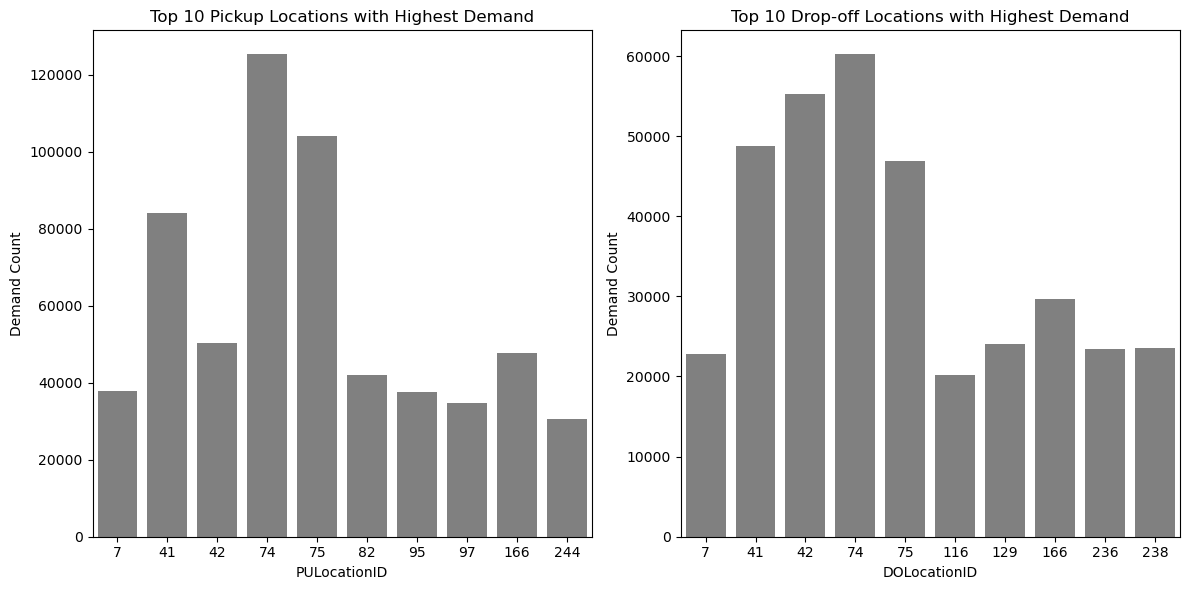

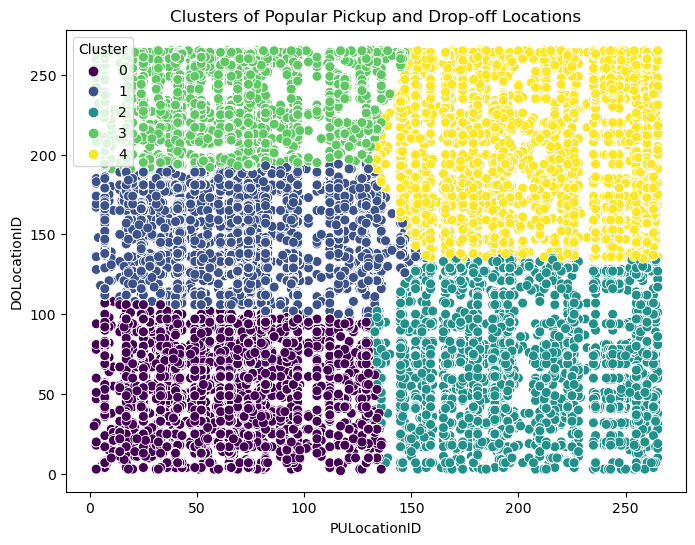

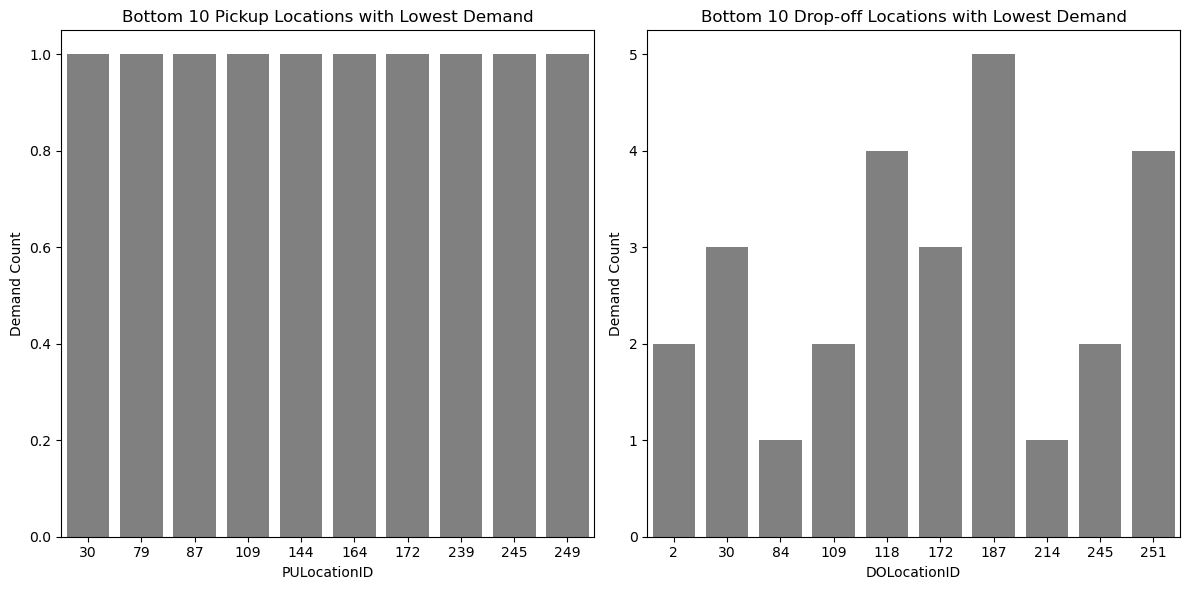

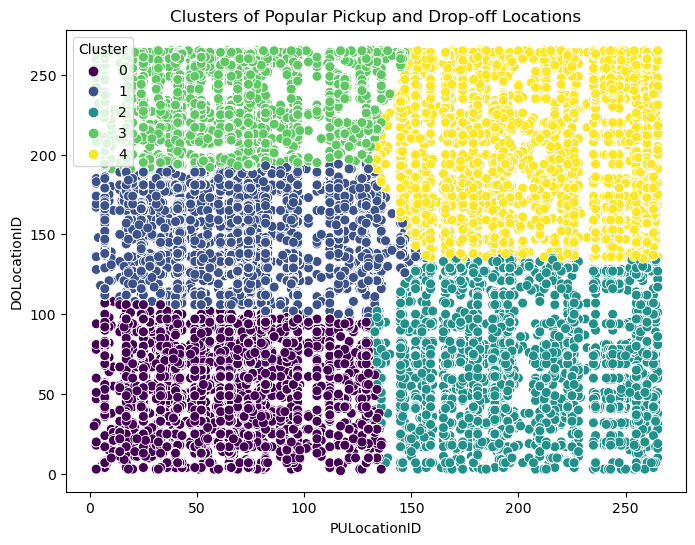

In [28]:
# Assuming 'df' is the pandas DataFrame containing the data
# Call the function with top=True for top 10, or top=False for bottom 10
analyze_pickup_dropoff_clusters(df, n_clusters=5, top=True)
analyze_pickup_dropoff_clusters(df, n_clusters=5, top=False)

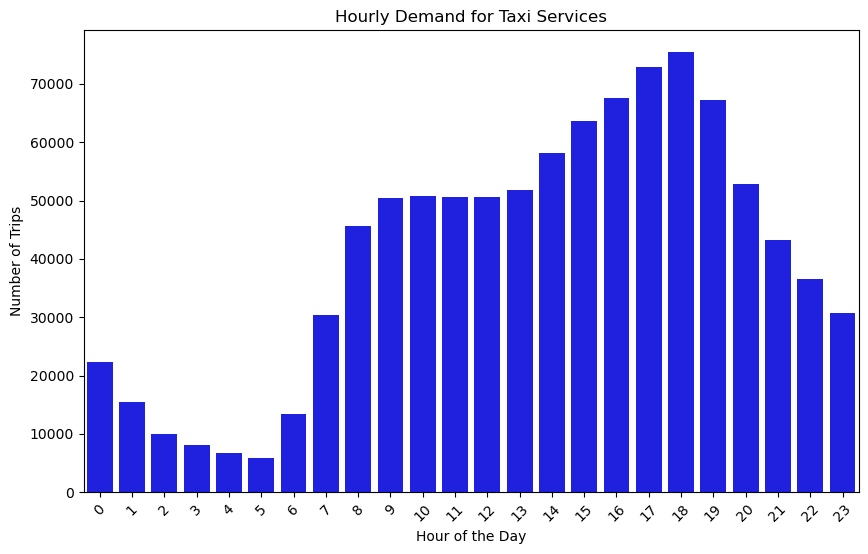

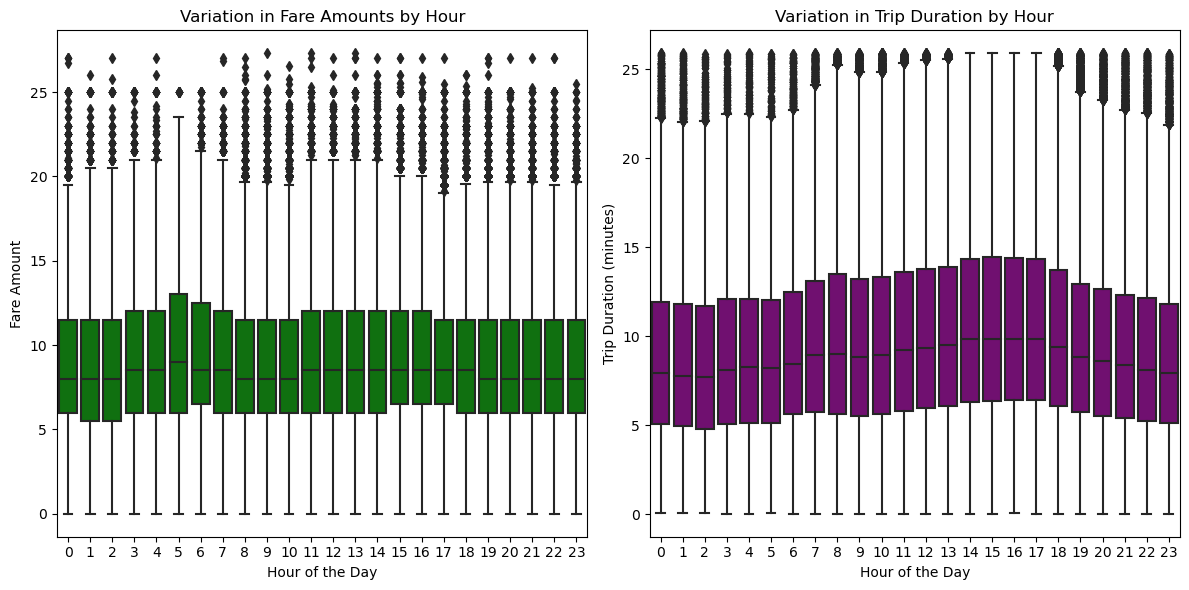

In [29]:
# Extract hour from pickup timestamp
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Calculate the demand (number of trips) for each hour
hourly_demand = df['pickup_hour'].value_counts().sort_index()

# Visualize the demand based on pickup timestamps
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, color='blue')
plt.title('Hourly Demand for Taxi Services')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Analyze fare amounts and trip durations during different times of the day
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='pickup_hour', y='fare_amount', color='green')
plt.title('Variation in Fare Amounts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration_minutes', color='purple')
plt.title('Variation in Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (minutes)')

plt.tight_layout()
plt.show()


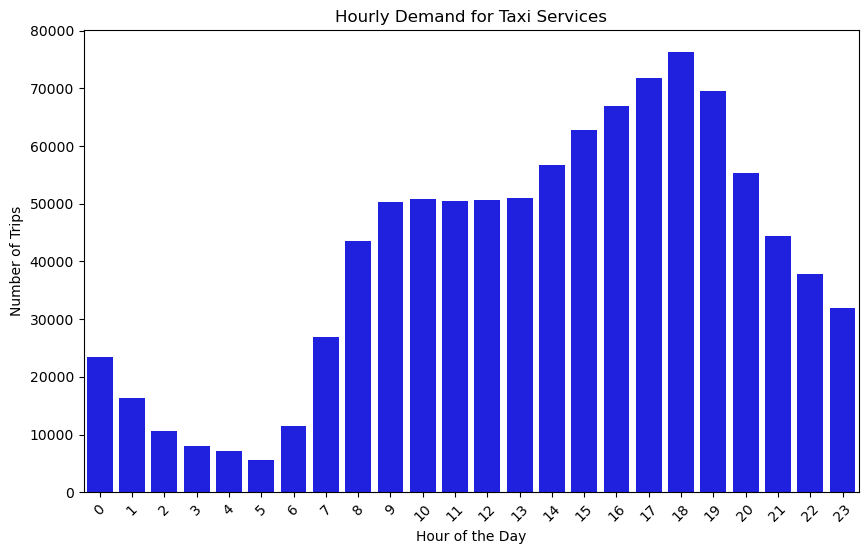

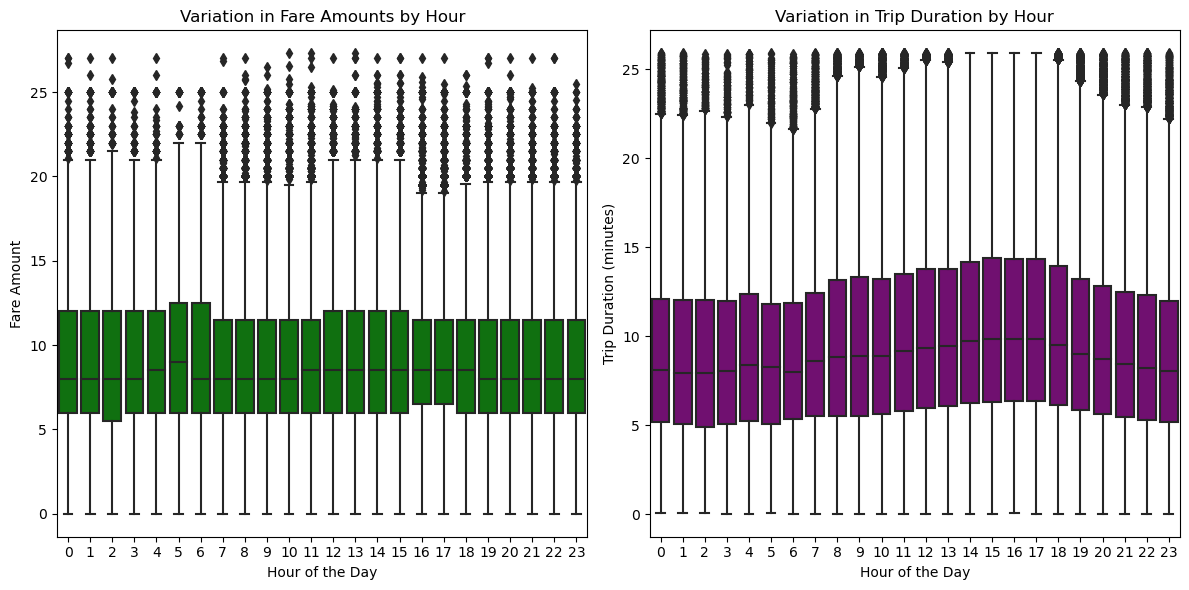

In [30]:
# Extract hour from pickup timestamp
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

# Calculate the demand (number of trips) for each hour
hourly_demand = df['dropoff_hour'].value_counts().sort_index()

# Visualize the demand based on pickup timestamps
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, color='blue')
plt.title('Hourly Demand for Taxi Services')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Analyze fare amounts and trip durations during different times of the day
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='dropoff_hour', y='fare_amount', color='green')
plt.title('Variation in Fare Amounts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='dropoff_hour', y='trip_duration_minutes', color='purple')
plt.title('Variation in Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (minutes)')

plt.tight_layout()
plt.show()


In [31]:
# 15. Vendor Analysis: What is the distribution of trips among different vendors (VendorID)? 
#     Is there any difference in trip duration, distance, or fare amounts based on the vendor?
vendor_counts = df['VendorID'].value_counts()
print("Frequency of Vendors:")
print(vendor_counts)

Frequency of Vendors:
2    833438
1    146813
Name: VendorID, dtype: int64


In [32]:
# Analyze trip duration, distance, and fare amounts for different vendors
vendor_stats = df.groupby('VendorID')[['trip_duration_minutes', 'trip_distance', 'fare_amount']].mean()
print(vendor_stats)

          trip_duration_minutes  trip_distance  fare_amount
VendorID                                                   
1                     10.052547       1.906260     9.063804
2                      9.979921       1.915028     9.208867


In [33]:
# Calculate mean trip duration, distance, and fare amounts for each vendor
vendor_stats = df.groupby('VendorID')[['trip_duration_minutes', 'trip_distance_km', 'fare_amount']].mean()

# Print the vendor statistics
print(vendor_stats)

# # Plot the trip statistics for different vendors
# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='trip_duration_minutes', color='blue')
# plt.title('Mean Trip Duration by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Trip Duration (Minutes)')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='trip_distance', color='green')
# plt.title('Mean Trip Distance by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Trip Distance')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='fare_amount', color='purple')
# plt.title('Mean Fare Amount by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Fare Amount')
# plt.show()


          trip_duration_minutes  trip_distance_km  fare_amount
VendorID                                                      
1                     10.052547          3.067829     9.063804
2                      9.979921          3.081939     9.208867
